In [2]:
import pandas as pd
import numpy as np

In [3]:
# Reading the dataset
df = pd.read_excel("/Users/kunal/Downloads/WalmartSales.xlsx")

In [4]:
# Showing the first 10 rows of dataset
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3
5,699-14-3026,B,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,3/25/2019,18:30:00,Ewallet,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,2/25/2019,14:36:00,Ewallet,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,2/24/2019,11:38:00,Ewallet,8.0
8,665-32-9167,B,Yangon,Member,Female,Health and beauty,36.26,2,1/10/2019,17:15:00,Credit card,7.2
9,692-92-5582,A,Mandalay,Member,Female,Food and beverages,54.84,3,2/20/2019,13:27:00,Credit card,5.9


In [5]:
# Add a 'Revenue' column to calculate revenue for each transaction
df['Revenue'] = df['Unit price'] * df['Quantity']

# Group data by 'City' and 'Branch' and calculate total sales and revenue
city_branch_performance = df.groupby(['City', 'Branch']).agg({
    'Invoice ID': 'count',  # Number of sales
    'Revenue': 'sum'        # Total revenue
}).reset_index()

# Rename columns for better clarity
city_branch_performance.columns = ['City', 'Branch', 'Total Sales', 'Total Revenue']


city_branch_performance


,City,Branch,Total Sales,Total Revenue
0,Mandalay,A,119,34130.09
1,Mandalay,B,118,37215.93
2,Mandalay,C,95,29794.62
3,Naypyitaw,A,110,35985.64
4,Naypyitaw,B,109,35157.75
5,Naypyitaw,C,109,34160.14
6,Yangon,A,114,33647.27
7,Yangon,B,113,35193.51
8,Yangon,C,113,32302.43


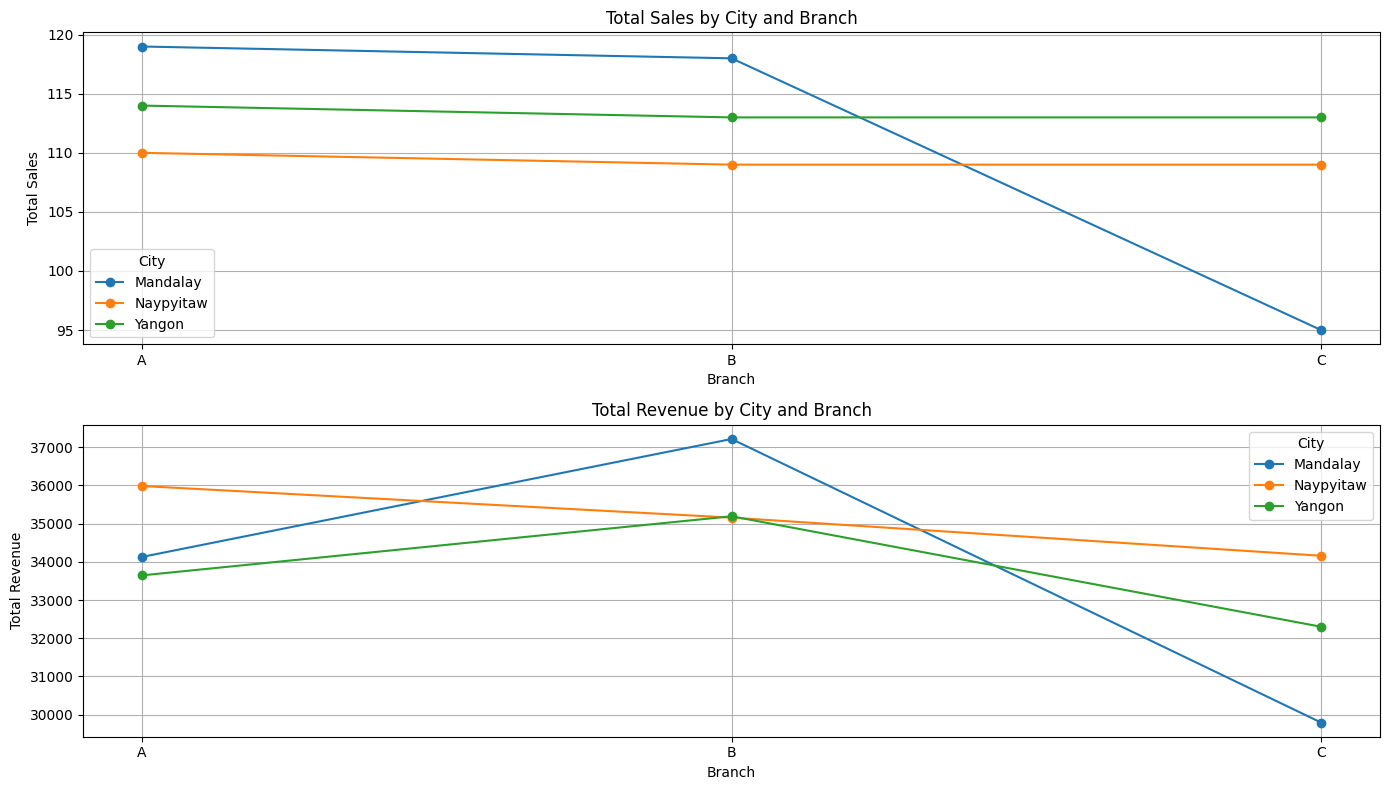

In [6]:
import matplotlib.pyplot as plt

# Plot the performance data
plt.figure(figsize=(14, 8))

# Total Sales
plt.subplot(2, 1, 1)
for city in city_branch_performance['City'].unique():
    city_data = city_branch_performance[city_branch_performance['City'] == city]
    plt.plot(city_data['Branch'], city_data['Total Sales'], marker='o', label=city)
plt.title('Total Sales by City and Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.legend(title='City')
plt.grid(True)

# Total Revenue
plt.subplot(2, 1, 2)
for city in city_branch_performance['City'].unique():
    city_data = city_branch_performance[city_branch_performance['City'] == city]
    plt.plot(city_data['Branch'], city_data['Total Revenue'], marker='o', label=city)
plt.title('Total Revenue by City and Branch')
plt.xlabel('Branch')
plt.ylabel('Total Revenue')
plt.legend(title='City')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



1. Overall Performance:

The data includes transactions from three cities: Mandalay, Naypyitaw, and Yangon, across three branches in each city.

2. Total Sales:

Mandalay has the highest total sales in Branch A (119), followed by Branch B (118), and Branch C (95).
Naypyitaw's sales are fairly consistent across all branches, with Branch A having slightly higher sales (110) compared to Branches B and C (both 109).
In Yangon, Branch A leads in total sales (114), closely followed by Branch B (113) and Branch C (113).

3. Total Revenue:

Mandalay Branch B generates the highest revenue ($37,215.93), followed by Branch A ($34,130.09) and Branch C ($29,794.62).
Naypyitaw Branch A also leads in revenue ($35,985.64), with Branches B ($35,157.75) and C ($34,160.14) trailing closely.
In Yangon, Branch B produces the highest revenue ($35,193.51), followed by Branch A ($33,647.27) and Branch C ($32,302.43).

# Average price of an item sold at each branch of the city

In [7]:
# Calculate the average price of an item sold at each branch in each city
average_price = df.groupby(['City', 'Branch']).agg({
    'Unit price': 'mean'
}).reset_index()

# Rename the column for better clarity
average_price.columns = ['City', 'Branch', 'Average Unit Price']


average_price


,City,Branch,Average Unit Price
0,Mandalay,A,53.353866
1,Mandalay,B,56.133305
2,Mandalay,C,57.958316
3,Naypyitaw,A,54.123182
4,Naypyitaw,B,57.785688
5,Naypyitaw,C,57.941009
6,Yangon,A,55.639298
7,Yangon,B,56.011062
8,Yangon,C,52.684602


# Analyze the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method, and identify the focus areas to get better sales for April 2019.

In [8]:
# Convert the 'Date' column to datetime format for easier manipulation
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Extract the month and year for month-over-month analysis
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group by YearMonth, Product line, Gender, and Payment Method
monthly_performance = df.groupby(['YearMonth', 'Product line', 'Gender', 'Payment']).agg({
    'Invoice ID': 'count',  # Number of sales
    'Revenue': 'sum'        # Total revenue
}).reset_index()

# Rename columns for better clarity
monthly_performance.columns = ['YearMonth', 'Product line', 'Gender', 'Payment', 'Total Sales', 'Total Revenue']

# Filter data for April 2019
april_2019_performance = monthly_performance[monthly_performance['YearMonth'] == '2019-04']

april_2019_performance


,YearMonth,Product line,Gender,Payment,Total Sales,Total Revenue


It appears there are no recorded sales for April 2019 in the dataset. Extending the analysis to identify trends in other months to provide insights on focus areas to improve sales. We'll analyze the overall monthly trends and look at the top-performing categories in other months, which can help guide strategies for April 2019.

In [9]:
# Group by YearMonth, Product line, Gender, and Payment Method for the entire dataset
monthly_trends = df.groupby(['YearMonth', 'Product line', 'Gender', 'Payment']).agg({
    'Invoice ID': 'count',  # Number of sales
    'Revenue': 'sum'        # Total revenue
}).reset_index()

# Rename columns for better clarity
monthly_trends.columns = ['YearMonth', 'Product line', 'Gender', 'Payment', 'Total Sales', 'Total Revenue']

monthly_trends


,YearMonth,Product line,Gender,Payment,Total Sales,Total Revenue
0,2019-01,Electronic accessories,Female,Cash,9,2731.86
1,2019-01,Electronic accessories,Female,Credit card,7,3045.42
2,2019-01,Electronic accessories,Female,Ewallet,7,1576.48
3,2019-01,Electronic accessories,Male,Cash,10,3380.29
4,2019-01,Electronic accessories,Male,Credit card,8,2248.65
...,...,...,...,...,...,...
103,2019-03,Sports and travel,Female,Credit card,9,2863.86
104,2019-03,Sports and travel,Female,Ewallet,8,3398.57
105,2019-03,Sports and travel,Male,Cash,8,2084.19
106,2019-03,Sports and travel,Male,Credit card,8,3633.90


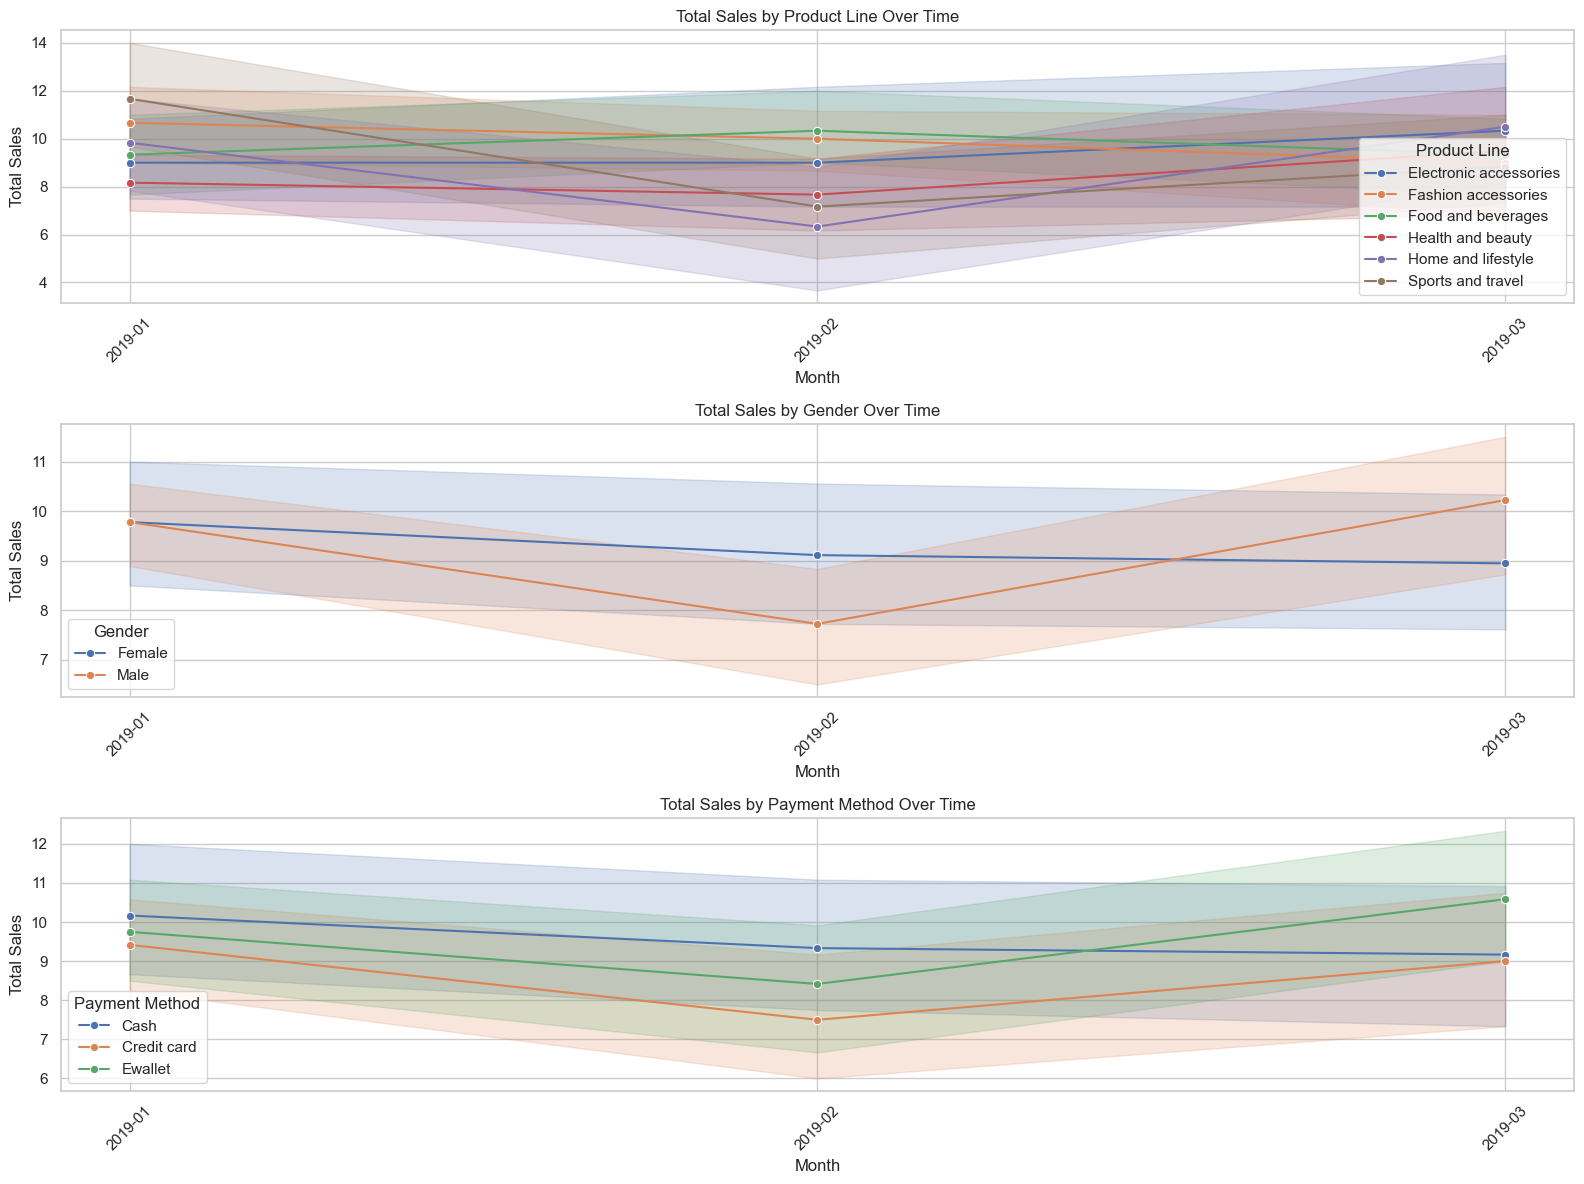

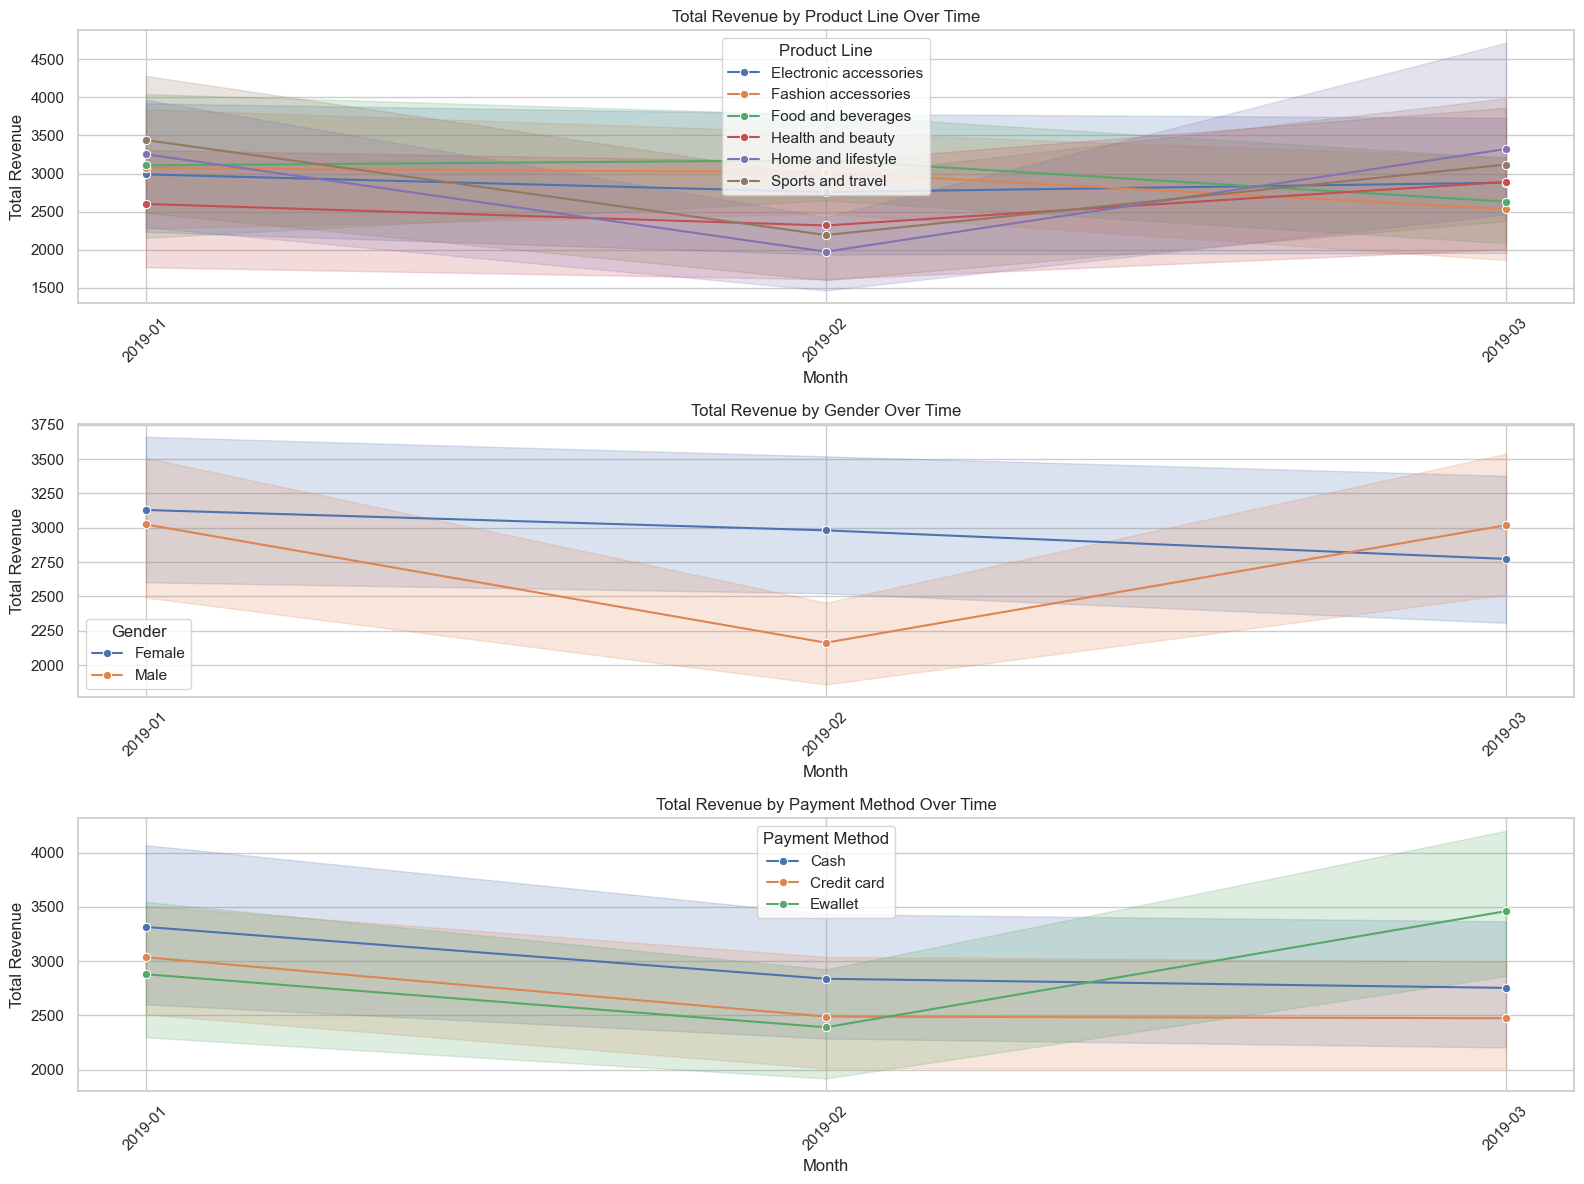

In [10]:
# Plotting monthly sales and revenue trends across Product line, Gender, and Payment Method
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Filter the necessary columns for plotting
monthly_trends['YearMonth'] = monthly_trends['YearMonth'].astype(str)  # Convert Period to string for plotting

# Plotting Total Sales over time
plt.figure(figsize=(16, 12))

# Sales by Product Line
plt.subplot(3, 1, 1)
sns.lineplot(data=monthly_trends, x='YearMonth', y='Total Sales', hue='Product line', marker='o')
plt.title('Total Sales by Product Line Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Product Line')
plt.xticks(rotation=45)

# Sales by Gender
plt.subplot(3, 1, 2)
sns.lineplot(data=monthly_trends, x='YearMonth', y='Total Sales', hue='Gender', marker='o')
plt.title('Total Sales by Gender Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Gender')
plt.xticks(rotation=45)

# Sales by Payment Method
plt.subplot(3, 1, 3)
sns.lineplot(data=monthly_trends, x='YearMonth', y='Total Sales', hue='Payment', marker='o')
plt.title('Total Sales by Payment Method Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Payment Method')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plotting Total Revenue over time
plt.figure(figsize=(16, 12))

# Revenue by Product Line
plt.subplot(3, 1, 1)
sns.lineplot(data=monthly_trends, x='YearMonth', y='Total Revenue', hue='Product line', marker='o')
plt.title('Total Revenue by Product Line Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Product Line')
plt.xticks(rotation=45)

# Revenue by Gender
plt.subplot(3, 1, 2)
sns.lineplot(data=monthly_trends, x='YearMonth', y='Total Revenue', hue='Gender', marker='o')
plt.title('Total Revenue by Gender Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Gender')
plt.xticks(rotation=45)

# Revenue by Payment Method
plt.subplot(3, 1, 3)
sns.lineplot(data=monthly_trends, x='YearMonth', y='Total Revenue', hue='Payment', marker='o')
plt.title('Total Revenue by Payment Method Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Payment Method')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Key Trends
Product Lines:

Electronic Accessories and Health and Beauty consistently show high sales and revenue across months.
Sports and Travel also exhibits strong performance in several months.
Gender:

Sales are relatively balanced between male and female customers.
Specific product lines like Fashion accessories and Health and Beauty tend to have higher sales among female customers.
Payment Methods:

Cash and Ewallet are the most frequently used payment methods, with Credit Card being slightly less popular but still significant.

# Focus Areas for April 2019
Increase Promotions on High-Performing Product Lines:

Focus on promoting Electronic Accessories, Health and Beauty, and Sports and Travel.
These categories have consistently shown high sales and revenue in previous months.
Targeted Marketing Based on Gender Preferences:

Tailor marketing campaigns to target female customers for product lines like Fashion accessories and Health and Beauty.
Highlight products that are popular among male customers in categories like Sports and Travel.
Enhance Payment Method Options:

Ensure ease of payment by emphasizing the availability of Cash and Ewallet options, as they are preferred by many customers.
Offer promotions or discounts for using specific payment methods to encourage more transactions.
Leverage Past Data for Timing Promotions:

Utilize insights from months with high sales to time promotions effectively.
Consider running targeted campaigns during periods when customers are more likely to make purchases based on past trends.